In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
houseP = pd.read_csv('preprocessing_final.csv')
houseP.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.229589,0,0


In [14]:
houseP.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

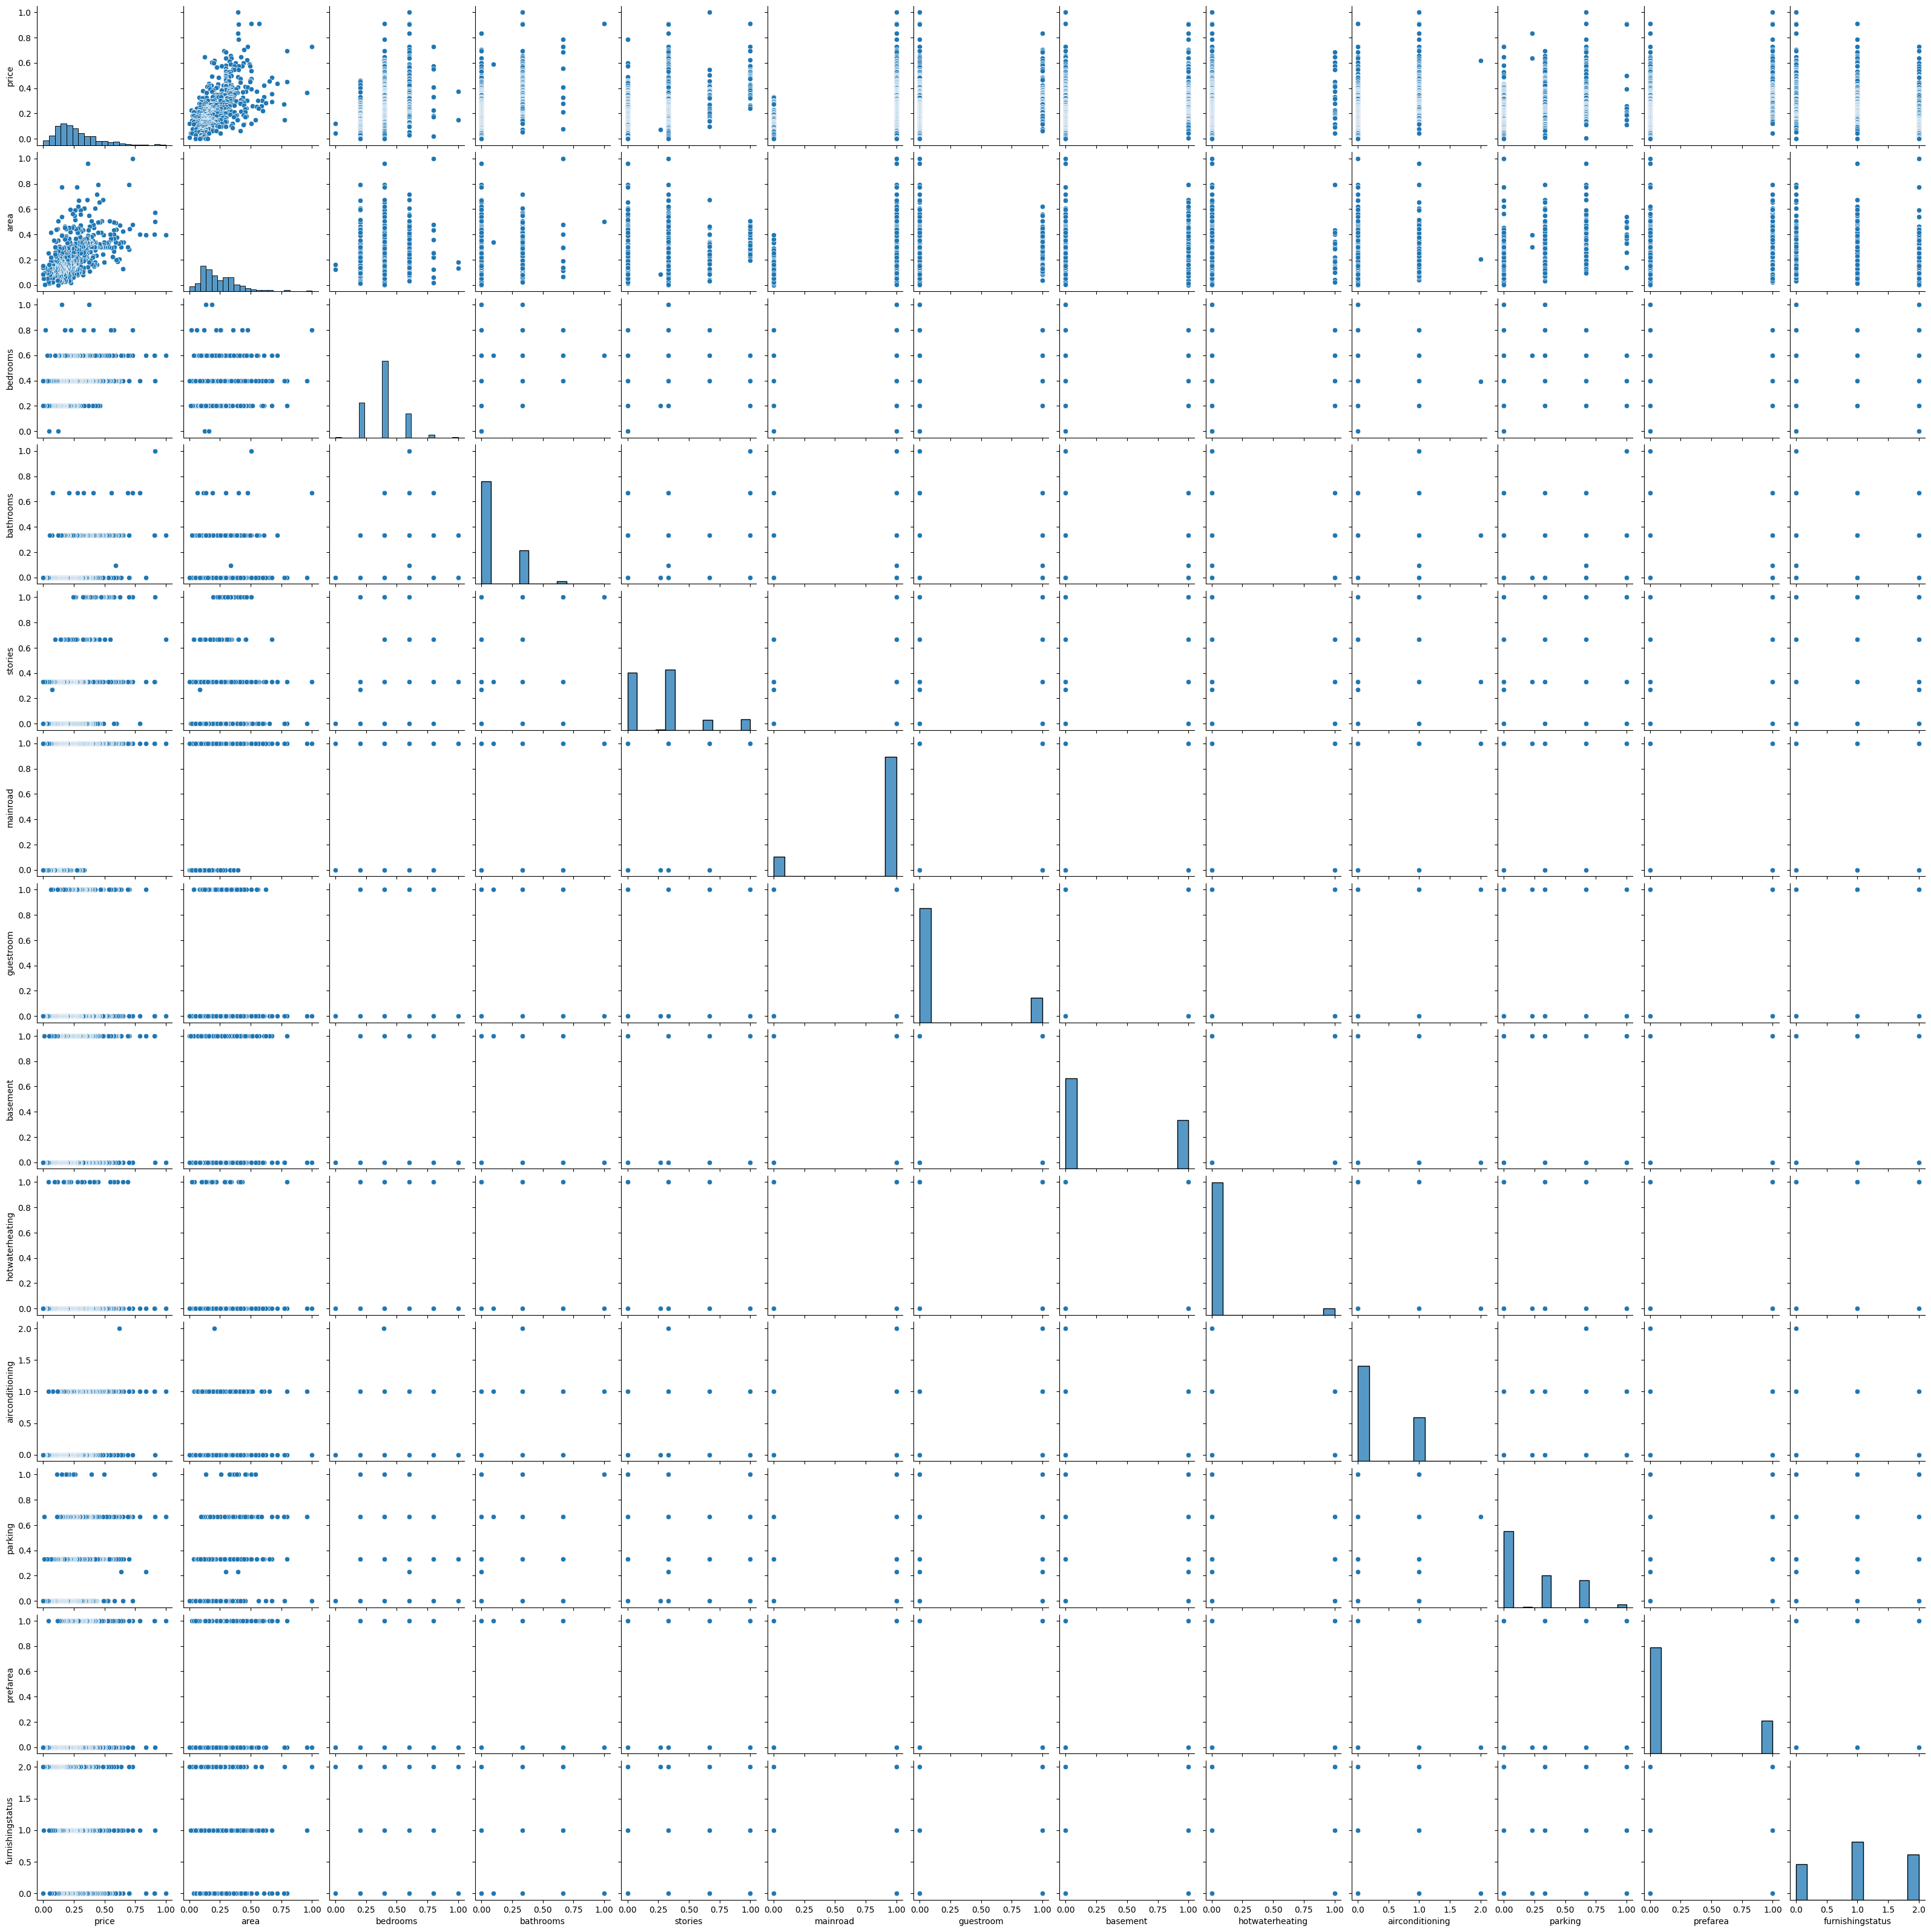

In [15]:
sns.pairplot(houseP)

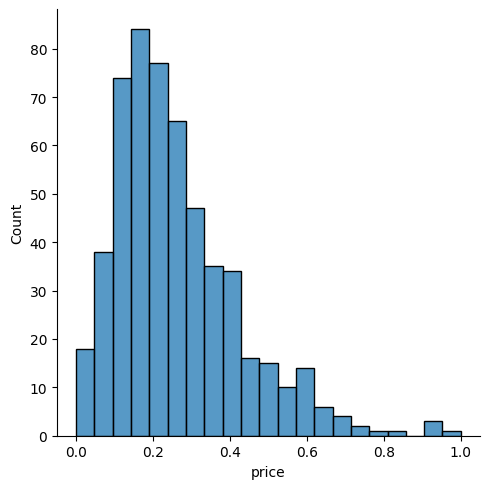

In [16]:
sns.displot(houseP['price'])

In [ ]:
sns.heatmap(houseP.corr())

# Simple Linear Regression

## X and y arrays

In [18]:
X=houseP[['price']]
X

,price
0,1.000000
1,0.909091
2,0.909091
3,0.906061
4,0.836364
...,...
540,0.006061
541,0.001485
542,0.000000
543,0.000000


In [19]:
y=houseP['area']
y

0      0.396564
1      0.502405
2      0.571134
3      0.402062
4      0.396564
         ...   
540    0.092784
541    0.051546
542    0.135395
543    0.086598
544    0.151203
Name: area, Length: 545, dtype: float64

# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [22]:
X_train

,price
227,0.254545
319,0.200000
367,0.166667
515,0.060606
143,0.333333
...,...
316,0.200000
393,0.151515
75,0.424242
337,0.187879


# Creating and Training the Model 

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [25]:
lm.intercept_

np.float64(0.11090203220773348)

In [26]:
lm.coef_

array([0.49663505])

# Prediction from our model

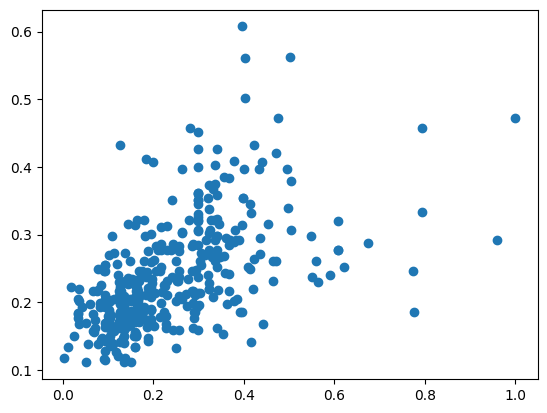

In [27]:
prediction_train=lm.predict(X_train)
plt.scatter(y_train,prediction_train)

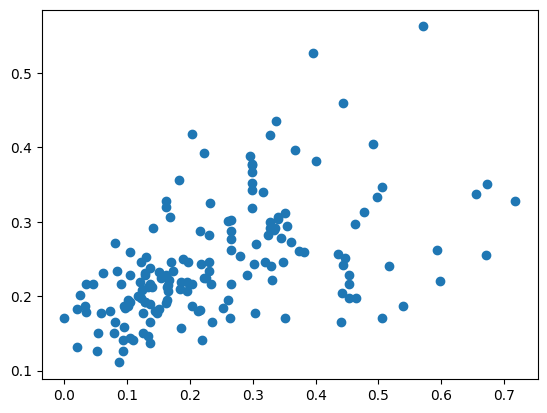

In [28]:
prediction_test=lm.predict(X_test)
plt.scatter(y_test,prediction_test)

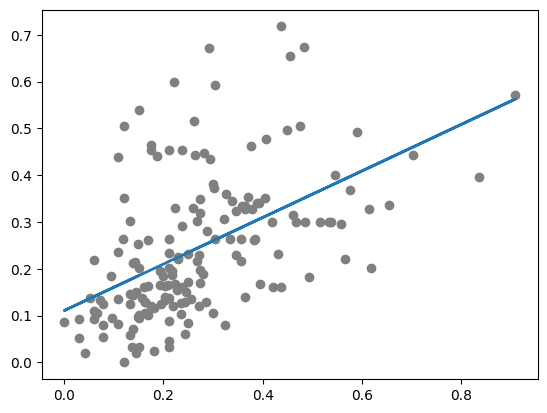

In [29]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,prediction_test,linewidth=2)

In [30]:
from sklearn import metrics

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test,prediction_test))
print('MSE:', metrics.mean_squared_error(y_test,prediction_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction_test)))

MAE: 0.09915849368706688
MSE: 0.016999894589595325
RMSE: 0.13038364387297713


In [32]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train,prediction_train)))

RMSE: 0.12377650274280665


In [33]:
df=pd.DataFrame({'Actual':y_test,'Predicted':prediction_test})
df

,Actual,Predicted
225,0.329210,0.240027
18,0.202749,0.417913
48,0.182131,0.356210
355,0.453608,0.197888
350,0.121649,0.198189
...,...,...
401,0.539519,0.186150
189,0.129897,0.252368
43,0.298969,0.366744
36,0.400825,0.381493


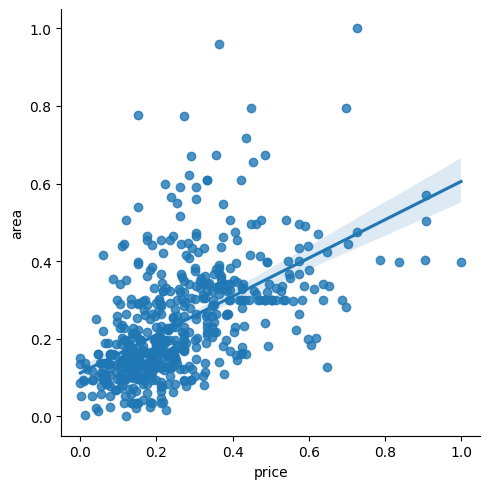

In [34]:
sns.lmplot(x='price',y='area',data=houseP)

In [35]:
X=houseP.iloc[:,0:5]
X

,price,area,bedrooms,bathrooms,stories
0,1.000000,0.396564,0.6,0.333333,0.666667
1,0.909091,0.502405,0.6,1.000000,1.000000
2,0.909091,0.571134,0.4,0.333333,0.333333
3,0.906061,0.402062,0.6,0.333333,0.333333
4,0.836364,0.396564,0.6,0.000000,0.333333
...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000
541,0.001485,0.051546,0.4,0.000000,0.000000
542,0.000000,0.135395,0.2,0.000000,0.000000
543,0.000000,0.086598,0.4,0.000000,0.000000


In [36]:
y

0      0.396564
1      0.502405
2      0.571134
3      0.402062
4      0.396564
         ...   
540    0.092784
541    0.051546
542    0.135395
543    0.086598
544    0.151203
Name: area, Length: 545, dtype: float64

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [38]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [39]:
lm.intercept_

np.float64(-5.551115123125783e-17)

In [40]:
lm.coef_

array([-7.05953605e-16,  1.00000000e+00,  6.90578812e-17,  9.64184181e-17,
        1.92804430e-16])

In [41]:
coef_df=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coef_df

,Coefficient
price,-7.059536e-16
area,1.000000e+00
bedrooms,6.905788e-17
bathrooms,9.641842e-17
stories,1.928044e-16


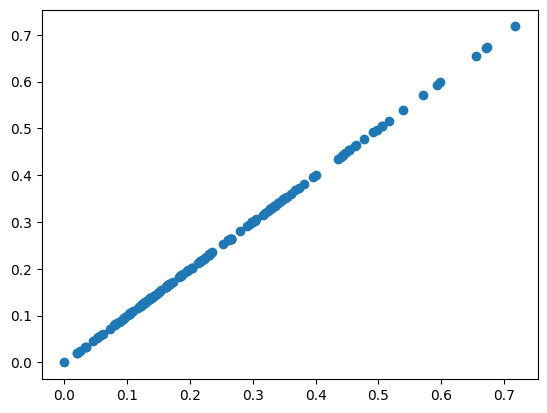

In [42]:
prediction_test=lm.predict(X_test)
plt.scatter(y_test,prediction_test)

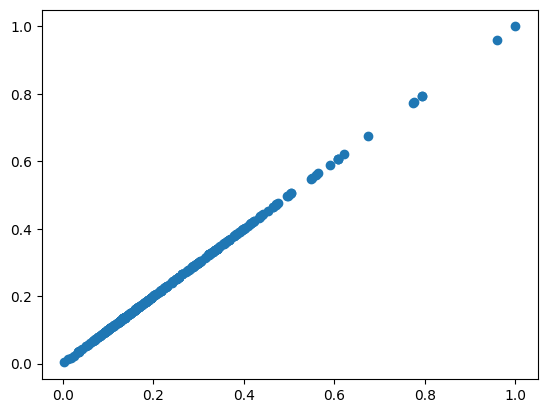

In [43]:
prediction_train=lm.predict(X_train)
plt.scatter(y_train,prediction_train)

In [44]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction_test)))

RMSE: 9.521342961405033e-17


In [45]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train,prediction_train)))

RMSE: 9.701574636370076e-17
